In [6]:
# prep to load our books
import sys, os

sys.path.append('/Users/andyreagan/work/2014/09-books/gutenbergdb')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import Book

In [7]:
query = Book.objects.filter(length__gte=30000,length__lte=31000,language='English')
# load all of the timeseries into a matrix
bigmatrix = np.ones([len(query),100])
for i,book in zip(range(len(query)),query):
    # print(book.title)
    f = open('timeseries-raw/{0}.csv'.format(book.filename),'r')
    t = np.array([float(x) for x in f.read().rstrip().split(',')])
    bigmatrix[i,:] = t

In [8]:
bigmatrix.shape

(145, 100)

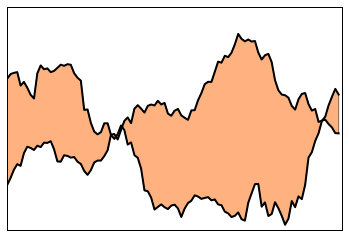

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(range(100),bigmatrix[0,:], lw=2, label='Book $i$', color='black')
ax.plot(range(100),bigmatrix[1,:], lw=2, label='Book $j$', color='black')
ax.fill_between(range(100), bigmatrix[0,:], bigmatrix[1,:], facecolor='#ff6700', alpha=0.5, label="Distance") #,hatch='\\')
# ax.set_title('random walkers empirical $\mu$ and $\pm \sigma$ interval')
# ax.legend(loc='upper left')
# ax.set_xlabel('num steps')
# ax.set_ylabel('position')
ax.set_xticks([])
ax.set_yticks([])
# ax.grid()
# plt.savefig('distance-plot.svg')

In [21]:
plt.fill_between?

In [32]:
for i in range(10):
    fig = plt.figure(figsize=(10,1))
    ax = fig.add_axes([0.2,0.2,0.7,0.7])
    ax.plot(range(100),bigmatrix[i,:], lw=2, label='mean population 1', color='#ff6700')
    plt.axis('off')
    plt.savefig('distance-plot-{0}.svg'.format(i))
    plt.close(fig)

In [33]:
x = np.linspace(0,np.pi*2,num=100)
for i in range(5):
    fig = plt.figure(figsize=(10,1))
    ax = fig.add_axes([0.2,0.2,0.7,0.7])
    ax.plot(x,np.sin((i+1)*x), lw=2, label='mean population 1', color='#ff6700')
    plt.axis('off')
    plt.savefig('sine-plot-{0}.svg'.format(i))
    plt.close(fig)